# Datenanalyse Kompensiert und Nicht Kompensiert

## DeepMotion Nicht Kompensiert

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.interpolate import interp1d
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [137]:
# Read the data to a pandas data frame
df_deepM_03 = pd.read_csv('../Data/KeypointsExportNichtKompensiert.csv', sep=',', encoding='utf-8')
df_deepM_03.head(5)

,path,frame,compensation,x_0,y_0,z_0,x_1,y_1,z_1,x_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,/Users/salomekoller/Library/CloudStorage/OneDr...,1,False,1001.2650,299.9778,5.740273,0,0,0,0,...,0,0,0,0,1042.304,1099.599,53.177670,960.2261,1099.599,53.177100
1,/Users/salomekoller/Library/CloudStorage/OneDr...,2,False,994.2407,299.8674,32.644620,0,0,0,0,...,0,0,0,0,1062.532,1095.770,1.359701,980.6707,1096.726,4.933856
2,/Users/salomekoller/Library/CloudStorage/OneDr...,3,False,992.9926,311.7958,56.879770,0,0,0,0,...,0,0,0,0,1074.930,1099.389,-33.079680,993.0182,1099.337,-31.914930
3,/Users/salomekoller/Library/CloudStorage/OneDr...,4,False,993.4746,312.0968,58.938110,0,0,0,0,...,0,0,0,0,1075.046,1099.478,-32.393410,993.1699,1099.447,-32.008440
4,/Users/salomekoller/Library/CloudStorage/OneDr...,5,False,993.6505,312.2529,60.182980,0,0,0,0,...,0,0,0,0,1075.126,1099.608,-32.330560,993.1870,1099.569,-31.727700


### Analysis

In [138]:
# Dimension (rows, columns)
print('Dimension:', df_deepM_03.shape)

# Number of rows
print('Number of rows:', df_deepM_03.shape[0])

# Number of columns
print('Number of columns:', df_deepM_03.shape[1])

Dimension: (1558, 102)
Number of rows: 1558
Number of columns: 102


### Splitting Frames

In [139]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM_03.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [176, 349, 522, 695, 869, 1043, 1217, 1391, 1558]


In [140]:
# Split DataFrame into segments based on frame changes
dfs = []
start = 0
for end in frames_until_reset:
    dfs.append(df_deepM_03.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfs))
for i, df in enumerate(dfs):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 9
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5
DataFrame 6
DataFrame 7
DataFrame 8
DataFrame 9


,path,frame,compensation,x_0,y_0,z_0,x_1,y_1,z_1,x_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
1391,/Users/salomekoller/Library/CloudStorage/OneDr...,1,False,1048.755,369.3246,-149.4805,0,0,0,0,...,0,0,0,0,1092.995,991.6038,-0.279770,1012.149,991.6655,-11.86949
1392,/Users/salomekoller/Library/CloudStorage/OneDr...,2,False,1049.495,369.4367,-149.0418,0,0,0,0,...,0,0,0,0,1093.230,991.7839,-0.311554,1012.315,991.8553,-11.97443
1393,/Users/salomekoller/Library/CloudStorage/OneDr...,3,False,1049.588,369.5414,-149.1297,0,0,0,0,...,0,0,0,0,1093.081,991.6736,0.402451,1012.160,991.7992,-11.28326
1394,/Users/salomekoller/Library/CloudStorage/OneDr...,4,False,1050.038,369.7272,-148.4501,0,0,0,0,...,0,0,0,0,1093.097,991.8264,0.484177,1012.261,991.9473,-11.20264
1395,/Users/salomekoller/Library/CloudStorage/OneDr...,5,False,1050.399,369.8057,-147.6427,0,0,0,0,...,0,0,0,0,1093.075,992.1176,0.172638,1012.235,992.2242,-11.48898


### Rechte Handbewegung Nicht Kompensiert

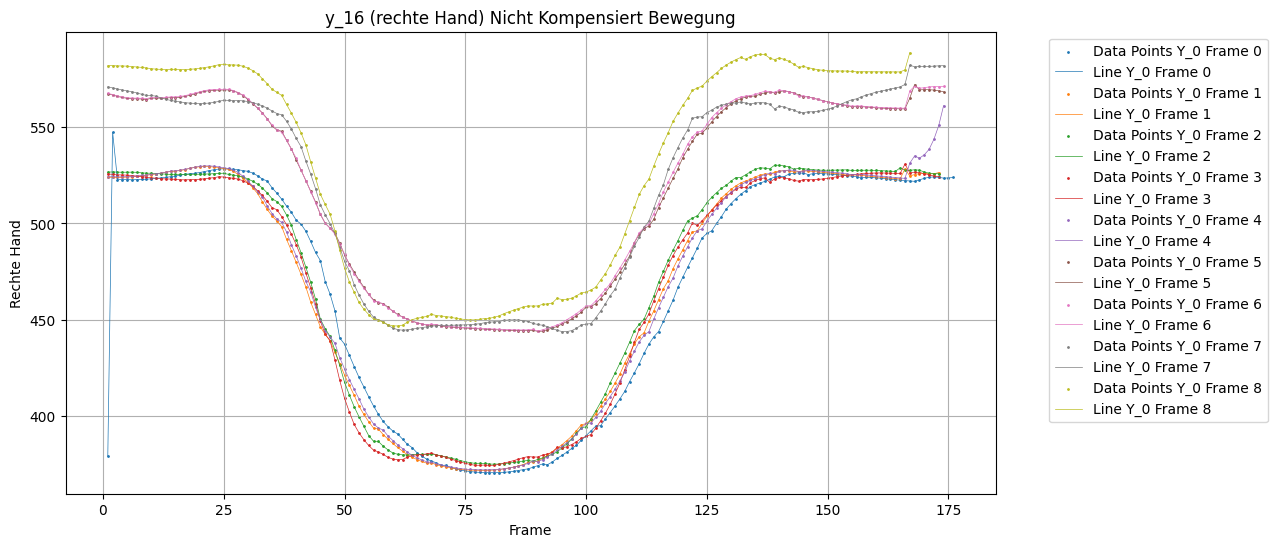

In [141]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("y_16 (rechte Hand) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Linke Handbewegung Nicht Kompensiert

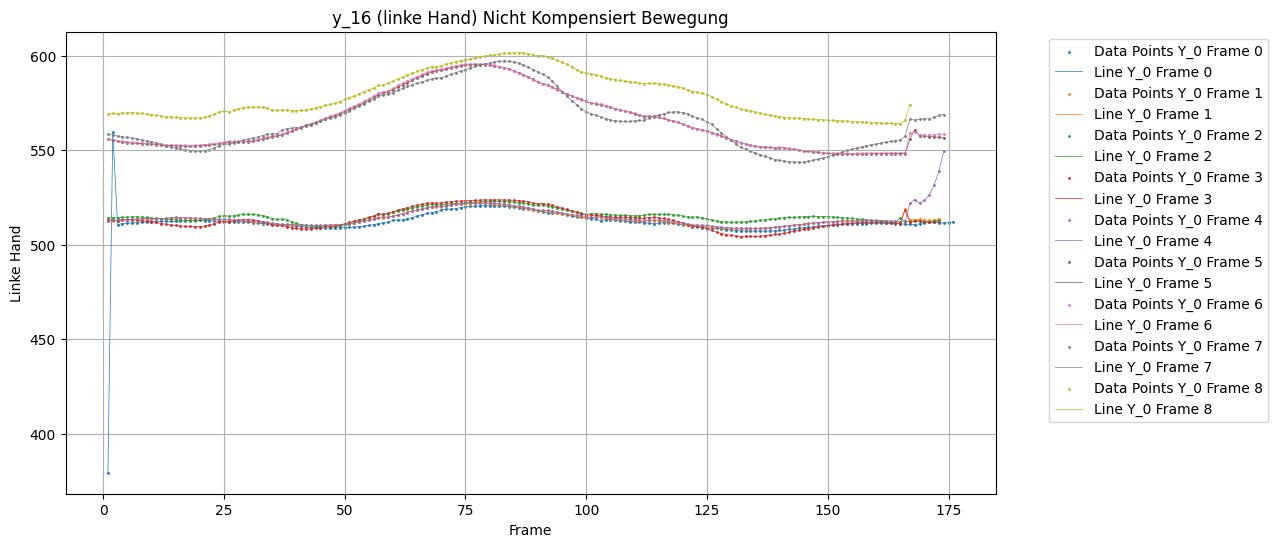

In [142]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("y_16 (linke Hand) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Linker Ellbogen Nicht Kompensiert

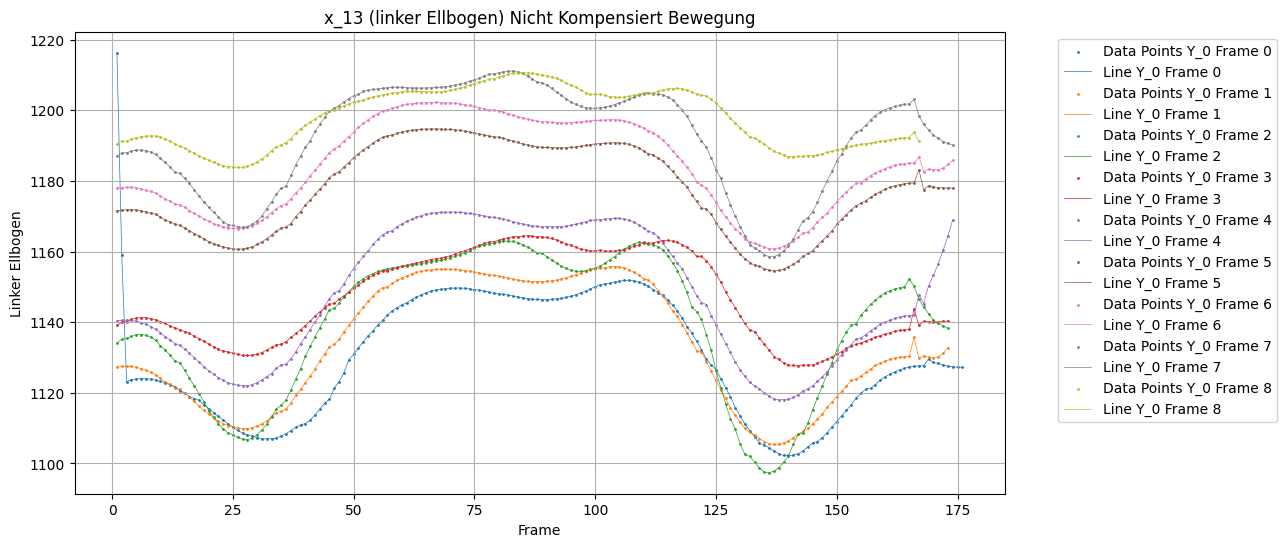

In [143]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')


plt.title("x_13 (linker Ellbogen) Nicht Kompensiert Bewegung")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Berechnung des Mean

In [144]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means03 = []

mean_values_03 = df_deepM_03[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means03.append(mean_values_03)
    
print(mean_values_03)

               x_0         y_0         z_0  x_1  y_1  z_1  x_2  y_2  z_2  x_3   
frame                                                                           
1      1018.346644  332.823544  -54.345983  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
2      1017.983411  332.676578  -50.590159  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1017.946556  333.856433  -47.885131  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1018.203844  333.868522  -46.912841  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      1018.341200  333.864378  -45.570783  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...            ...         ...         ...  ...  ...  ...  ...  ...  ...  ...   
172    1020.753612  334.673212  -47.480109  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
173    1020.479275  335.316025  -53.421516  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
174    1031.344060  350.000620 -113.474918  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
175     995.751600  313.205600   53.708920  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
176     994.601300  313.1946

### Mean rechte Hand

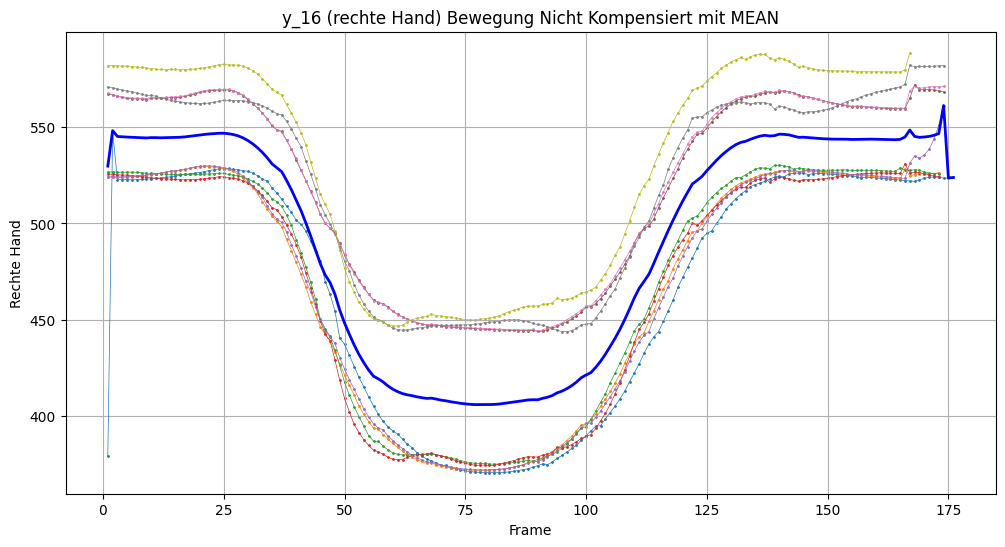

In [145]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfs):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

# Plot the mean values per frame
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung Nicht Kompensiert mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)

plt.show()


## DeepMotion Kompensiert

In [146]:
# Read the data to a pandas data frame
df_deepM01 = pd.read_csv('../Data/KeypointsExportKompensiert.csv', sep=',', encoding='utf-8')
df_deepM01.head(5)

,path,frame,compensation,x_0,y_0,z_0,x_1,y_1,z_1,x_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,/Users/salomekoller/Library/CloudStorage/OneDr...,1,True,1001.2650,299.9778,5.740273,0,0,0,0,...,0,0,0,0,1042.304,1099.599,53.177670,960.2261,1099.599,53.17710
1,/Users/salomekoller/Library/CloudStorage/OneDr...,2,True,997.9434,300.2990,35.684650,0,0,0,0,...,0,0,0,0,1060.281,1096.716,-9.019012,978.3870,1097.825,-10.36256
2,/Users/salomekoller/Library/CloudStorage/OneDr...,3,True,1002.9200,310.8007,52.818450,0,0,0,0,...,0,0,0,0,1072.040,1099.910,-47.172060,990.3528,1099.901,-48.07067
3,/Users/salomekoller/Library/CloudStorage/OneDr...,4,True,1005.2510,310.6567,51.014550,0,0,0,0,...,0,0,0,0,1072.324,1100.113,-46.985940,990.2980,1100.189,-47.65361
4,/Users/salomekoller/Library/CloudStorage/OneDr...,5,True,1006.6970,310.5737,49.840250,0,0,0,0,...,0,0,0,0,1072.204,1100.321,-47.201520,990.2787,1100.399,-47.50959


### Analysis

In [147]:
# Dimension (rows, columns)
print('Dimension:', df_deepM01.shape)

# Number of rows
print('Number of rows:', df_deepM01.shape[0])

# Number of columns
print('Number of columns:', df_deepM01.shape[1])


Dimension: (1558, 102)
Number of rows: 1558
Number of columns: 102


### Splitting Frames

In [148]:
# Initialize variables
frame_count = 0
frames_until_reset = []

# Iterate over the rows of the DataFrame
for index, row in df_deepM01.iterrows():
    # Increment frame count
    frame_count += 1
    
    # Check if the "frame" value changes from a non-1 value to 1
    if row["frame"] == 1 and frame_count > 1:
        # Add frame count to the list
        frames_until_reset.append(frame_count -1)


# If the last frame is not 1, add the remaining frame count to the list
if frame_count > 0:
    frames_until_reset.append(frame_count)

# Print the number of frames until reset for each cycle
print("Number of frames until reset for each cycle:", frames_until_reset)

Number of frames until reset for each cycle: [200, 405, 610, 816, 1023, 1228, 1434, 1558]


In [149]:
# Split DataFrame into segments based on frame changes
dfsKomp01 = []
start = 0
for end in frames_until_reset:
    dfsKomp01.append(df_deepM01.iloc[start:end])
    start = end

# Print the number of splits and the resulting DataFrames
print("Number of splits:", len(dfsKomp01))
for i, df in enumerate(dfsKomp01):
    print(f"DataFrame {i+1}")
df.head(5)

Number of splits: 8
DataFrame 1
DataFrame 2
DataFrame 3
DataFrame 4
DataFrame 5
DataFrame 6
DataFrame 7
DataFrame 8


,path,frame,compensation,x_0,y_0,z_0,x_1,y_1,z_1,x_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
1434,/Users/salomekoller/Library/CloudStorage/OneDr...,1,True,1207.712,674.5577,-283.0784,0,0,0,0,...,0,0,0,0,1269.742,1469.721,-261.2342,1193.811,1470.589,-230.2229
1435,/Users/salomekoller/Library/CloudStorage/OneDr...,2,True,1216.668,819.1280,-248.0831,0,0,0,0,...,0,0,0,0,1333.920,1436.973,-138.1703,1258.261,1436.523,-106.4704
1436,/Users/salomekoller/Library/CloudStorage/OneDr...,3,True,1217.702,813.3007,-247.9548,0,0,0,0,...,0,0,0,0,1328.888,1441.006,-152.4207,1253.336,1440.674,-120.5192
1437,/Users/salomekoller/Library/CloudStorage/OneDr...,4,True,1220.111,809.2093,-250.0324,0,0,0,0,...,0,0,0,0,1324.296,1442.848,-160.9133,1248.660,1442.999,-129.5927
1438,/Users/salomekoller/Library/CloudStorage/OneDr...,5,True,1220.764,809.5942,-251.5481,0,0,0,0,...,0,0,0,0,1325.301,1443.218,-161.9623,1249.716,1443.269,-130.5303


### Rechte Handbewegung Kompensiert

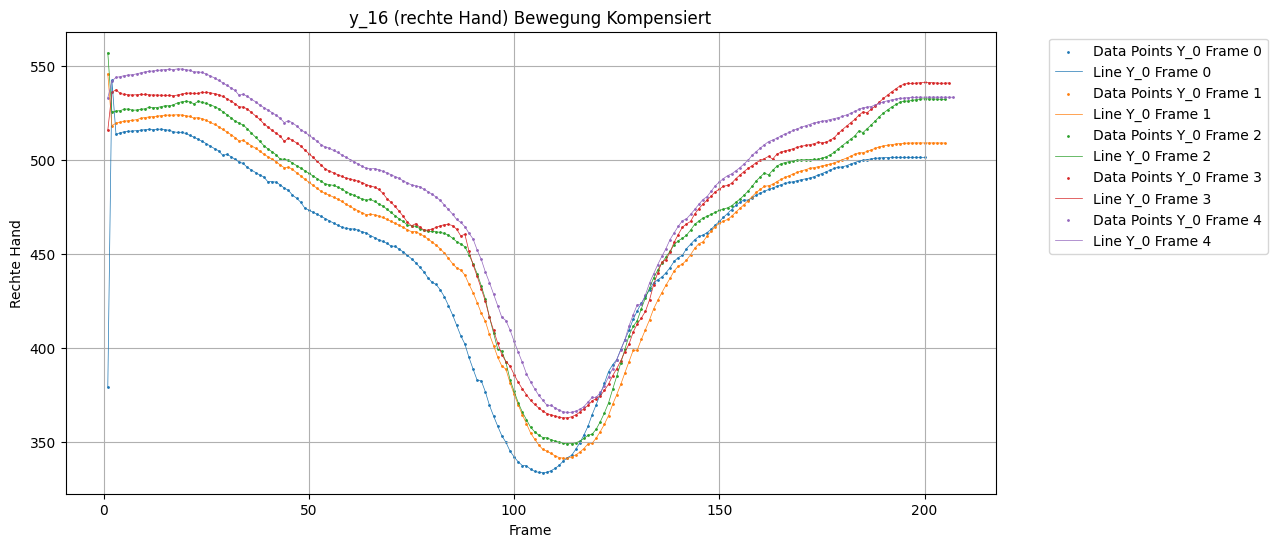

In [150]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs from index 0 to 4
for i, df in enumerate(dfsKomp01[:5]):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)

# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


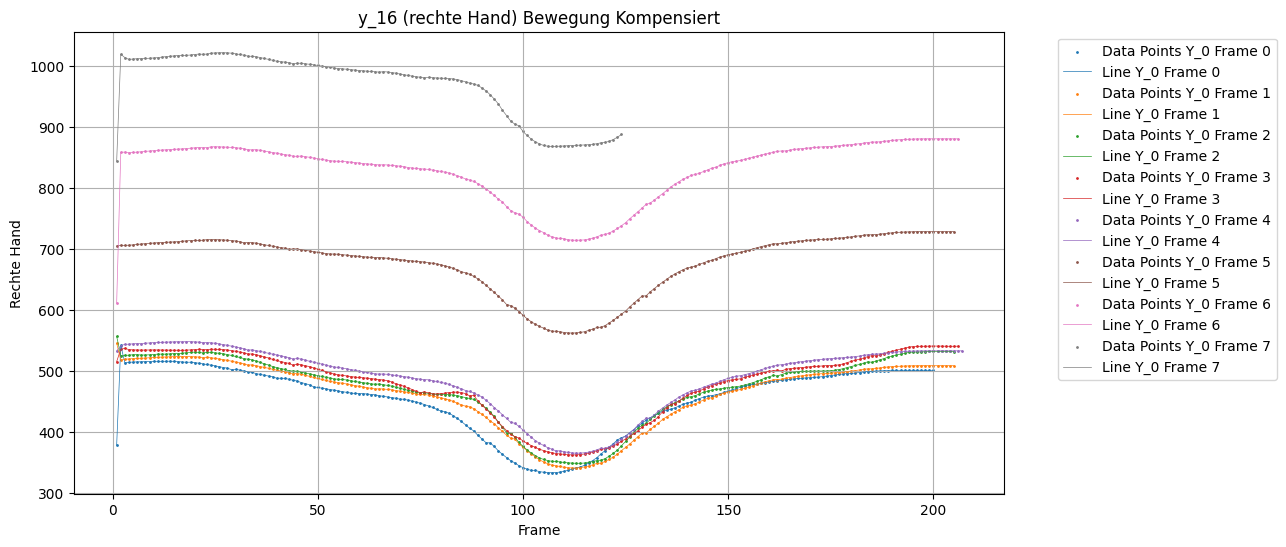

In [151]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Linke Handbewegung Kompensiert

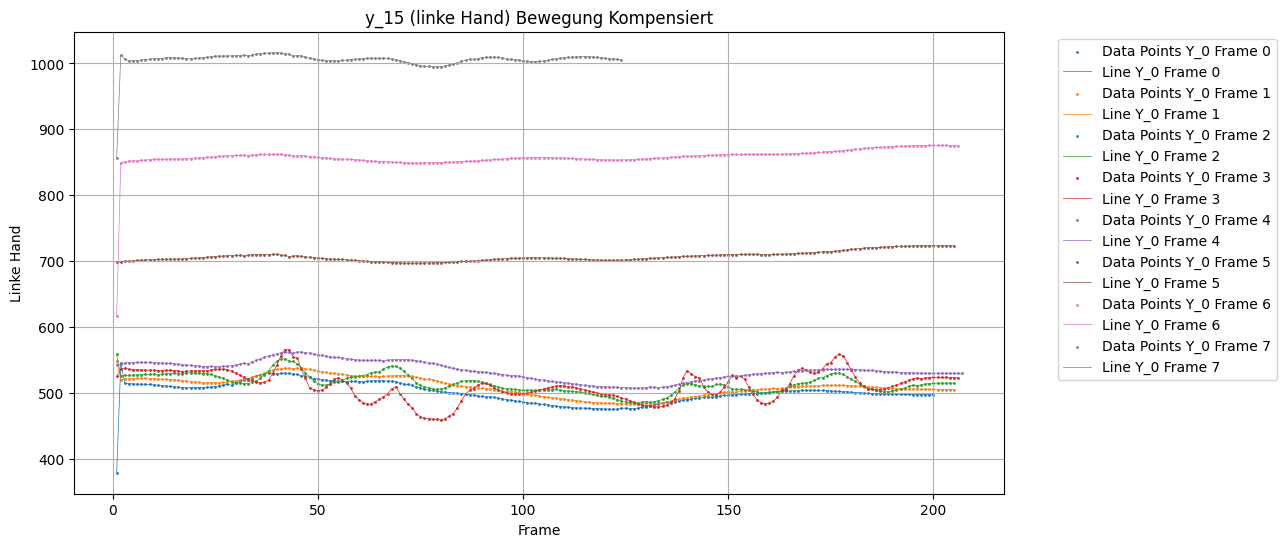

In [152]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["y_15"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["y_15"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("y_15 (linke Hand) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Linker Ellbogen Kompensiert

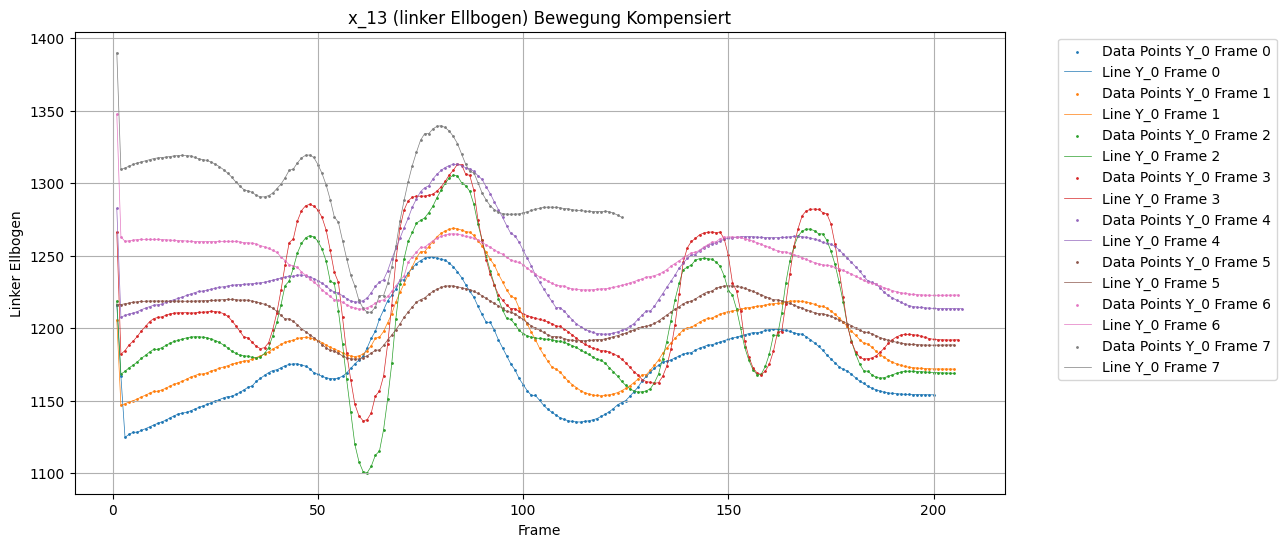

In [153]:
# Set the size of the figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):
    plt.scatter(df["frame"], df["x_13"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    plt.plot(df["frame"], df["x_13"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

plt.title("x_13 (linker Ellbogen) Bewegung Kompensiert")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
# Move the legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


### Berechnung des Mean

In [154]:
# Calculate the mean for the specified columns in each DataFrame in dfs
means01 = []

mean_values_01 = df_deepM01[['frame', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'x_2', 'y_2', 'z_2', 'x_3', 'y_3', 'z_3',
                   'x_4', 'y_4', 'z_4', 'x_5', 'y_5', 'z_5', 'x_6', 'y_6', 'z_6', 'x_7', 'y_7', 'z_7',
                   'x_8', 'y_8', 'z_8', 'x_9', 'y_9', 'z_9', 'x_10', 'y_10', 'z_10', 'x_11', 'y_11', 'z_11',
                   'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                   'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                   'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                   'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
                   'x_28', 'y_28', 'z_28', 'x_29', 'y_29', 'z_29', 'x_30', 'y_30', 'z_30', 'x_31', 'y_31', 'z_31',
                   'x_32', 'y_32', 'z_32']].groupby('frame').mean()
means01.append(mean_values_01)
    
print(mean_values_01)

               x_0         y_0         z_0  x_1  y_1  z_1  x_2  y_2  z_2  x_3   
frame                                                                           
1      1089.195625  406.823775 -258.802851  0.0  0.0  0.0  0.0  0.0  0.0  0.0  \
2      1090.849175  449.822013 -230.221874  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3      1092.852125  451.488162 -228.876329  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4      1094.918000  450.460500 -231.003334  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5      1095.917000  450.352600 -232.470535  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...            ...         ...         ...  ...  ...  ...  ...  ...  ...  ...   
203    1087.551333  425.523100 -350.086333  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
204    1087.550333  425.465933 -350.104500  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
205    1087.557167  425.432117 -350.105433  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
206    1109.125333  456.197400 -409.920733  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
207    1109.193000  342.3635

### Mean rechte Hand

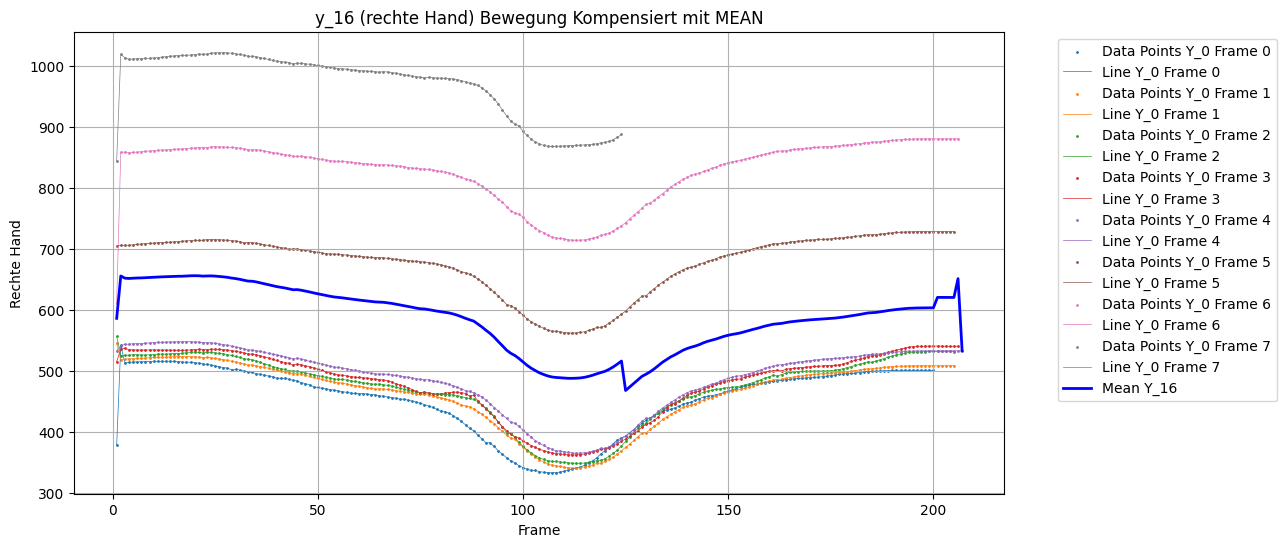

In [155]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

# Plot each DataFrame in dfs
for i, df in enumerate(dfsKomp01):

    # Plot the values of "y_0" against "frame" as dots
    plt.scatter(df["frame"], df["y_16"], marker='o', color=f'C{i}', label=f'Data Points Y_0 Frame {i}', s=1)
    # Plot the line connecting the data points
    plt.plot(df["frame"], df["y_16"], color=f'C{i}', linestyle='-', linewidth=0.5, label=f'Line Y_0 Frame {i}')

# Plot the mean values per frame
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='b', linestyle='-', linewidth=2, label='Mean Y_16')

plt.title("y_16 (rechte Hand) Bewegung Kompensiert mit MEAN")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Berechnung Euclidean Distances

## Analyse der Kompensierten und nicht Komptensierten Mean Werte

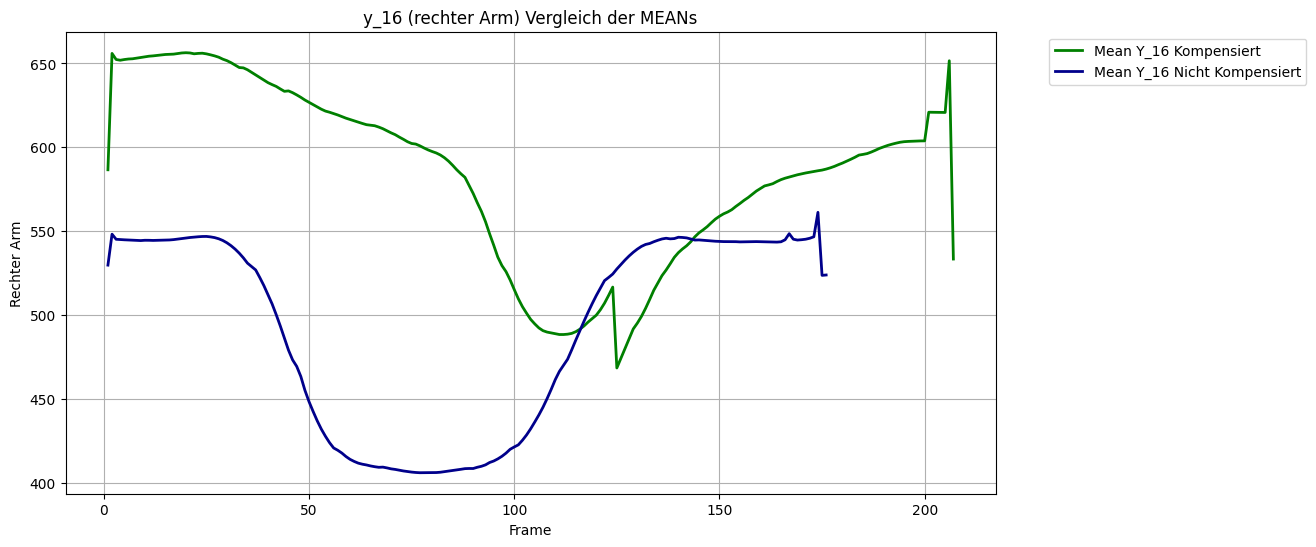

In [156]:
# Set the size of the figure
plt.figure(figsize=(12, 6))

plt.plot(mean_values_01.index, mean_values_01["y_16"], color='green', linestyle='-', linewidth=2, label='Mean Y_16 Kompensiert')
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='darkblue', linestyle='-', linewidth=2, label='Mean Y_16 Nicht Kompensiert')

plt.title("y_16 (rechter Arm) Vergleich der MEANs")
plt.xlabel("Frame")
plt.ylabel("Rechter Arm")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Euclidean Distances

In [157]:
# Define the columns for which you want to calculate the Euclidean distances
columns = ['frame', 'x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
           'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
           'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
           'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
           'x_24', 'y_24', 'z_24', 'x_25', 'y_25', 'z_25', 'x_26', 'y_26', 'z_26', 'x_27', 'y_27', 'z_27',
           'x_28', 'y_28', 'z_28', 'x_31', 'y_31', 'z_31', 'x_32', 'y_32', 'z_32']

# Calculate the Euclidean distances grouped by 'frame'
euclidean_distances_03 = {}

# Get common frames between mean_values_03 and mean_values_01
common_frames = mean_values_03.index.intersection(mean_values_01.index)

# Iterate over each frame and calculate the Euclidean distance for each column
for frame in common_frames:
    euclidean_distances_03[frame] = []
    for col in columns[1:]:
        point_1 = (frame, mean_values_03.loc[frame, col])
        point_2 = (frame, mean_values_01.loc[frame, col])
        euclidean_distance_03 = distance.euclidean(point_1, point_2)
        euclidean_distances_03[frame].append(euclidean_distance_03)

# Convert the dictionary to a DataFrame
euclidean_df_03 = pd.DataFrame.from_dict(euclidean_distances_03, orient='index', columns=columns[1:])

print(euclidean_df_03)

           x_0         y_0         z_0       x_11        y_11        z_11   
1    70.848981   74.000231  204.456868  61.783056   79.968887  197.287652  \
2    72.865764  117.145435  179.631715  61.393014  117.931887  182.675091   
3    74.905569  117.631729  180.991198  63.410292  118.496674  184.043885   
4    76.714156  116.591978  184.090493  65.185861  117.718861  186.860809   
5    77.575800  116.488222  186.899752  66.251236  117.728522  189.569898   
..         ...         ...         ...        ...         ...         ...   
172  75.016959   78.991430  287.569374  62.962357   75.395986  296.809068   
173  74.816296   78.146404  281.843671  62.557589   74.562439  291.201441   
174  63.478940   63.247994  222.251542  50.495857   59.741540  232.154194   
175  98.512686   99.817743  389.919590  88.590429   96.467743  396.909686   
176  98.965557   99.555314  387.871641  88.822571   96.258314  394.892094   

          x_12        y_12        z_12        x_13  ...        z_27   
1   

### Rechte Hand

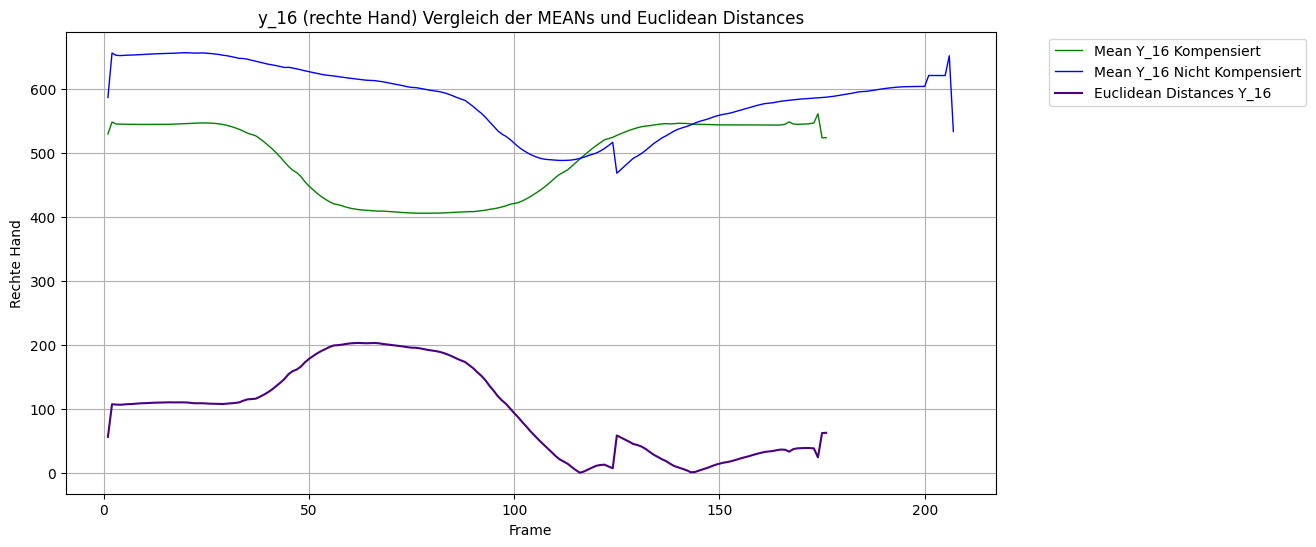

In [158]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_16"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_16"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_16"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("y_16 (rechte Hand) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Rechte Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Linke Hand

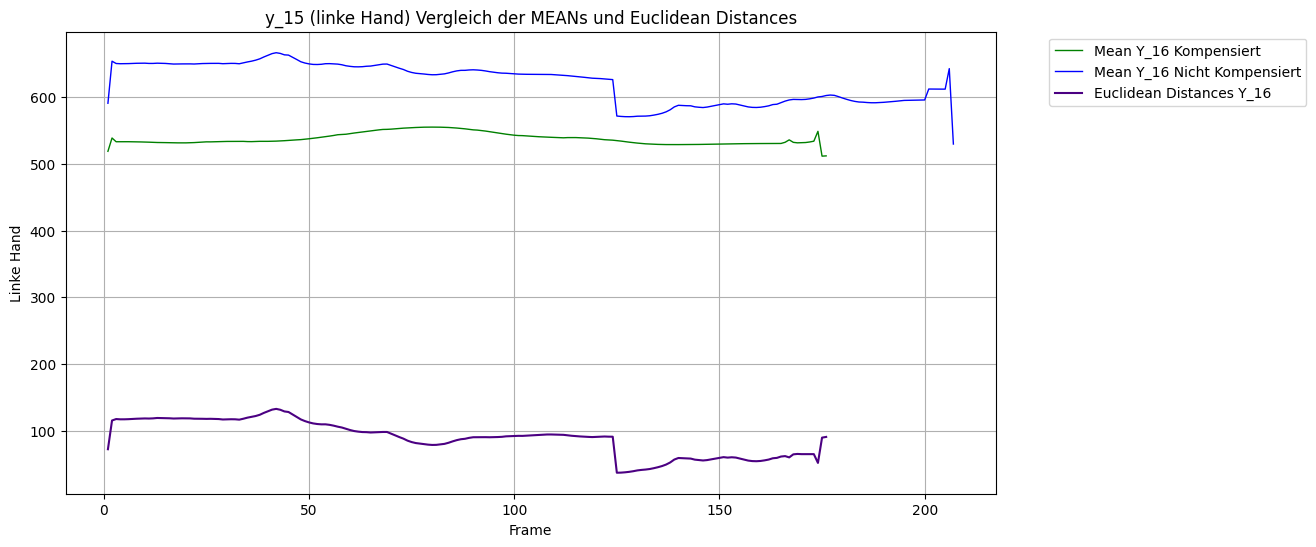

In [159]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["y_15"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["y_15"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["y_15"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("y_15 (linke Hand) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linke Hand")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Linker Ellbogen

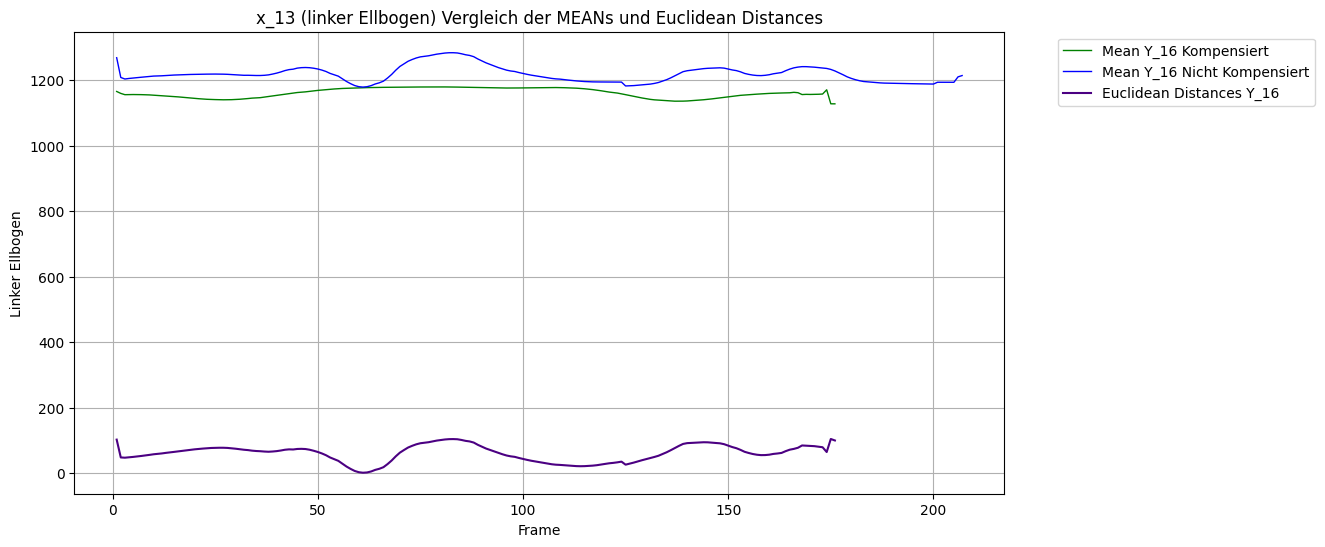

In [160]:
plt.figure(figsize=(12, 6))

# Plot the mean values for DeepMotion 01
plt.plot(mean_values_03.index, mean_values_03["x_13"], color='green', linestyle='-', linewidth=1, label='Mean Y_16 Kompensiert')

# Plot the mean values for Mediapipe 01
plt.plot(mean_values_01.index, mean_values_01["x_13"], color='blue', linestyle='-', linewidth=1, label='Mean Y_16 Nicht Kompensiert')

# Plot the Euclidean distances for the last calculated column
plt.plot(euclidean_df_03.index, euclidean_df_03["x_13"], color='indigo', linestyle='-', linewidth=1.5, label='Euclidean Distances Y_16')


plt.title("x_13 (linker Ellbogen) Vergleich der MEANs und Euclidean Distances")
plt.xlabel("Frame")
plt.ylabel("Linker Ellbogen")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

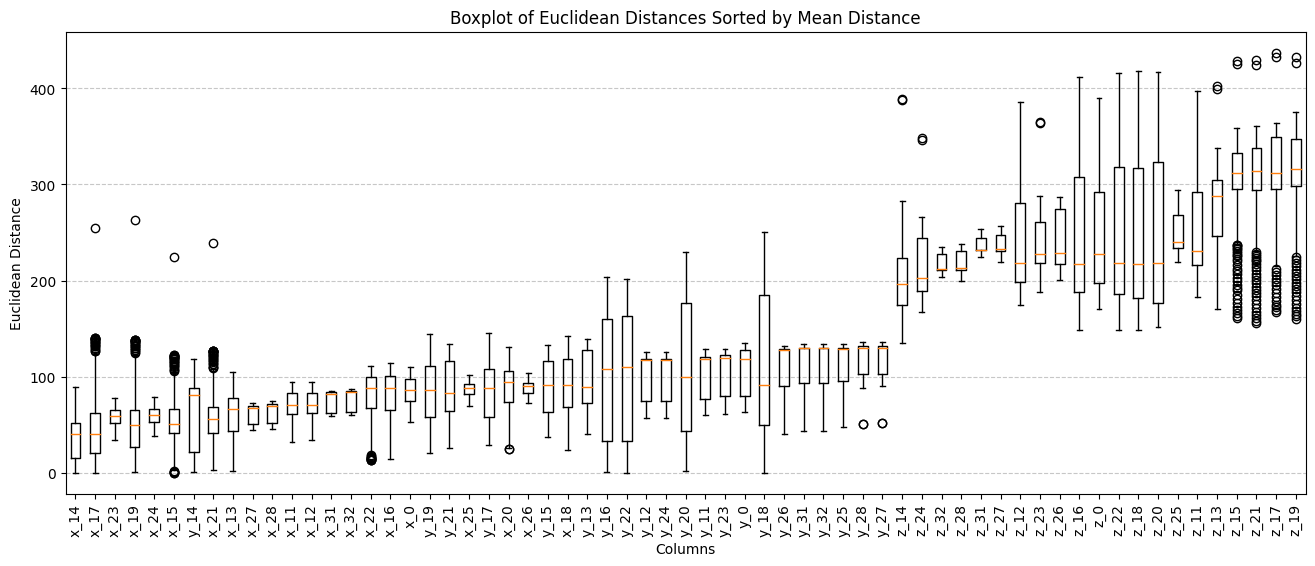

In [161]:
# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03.mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns, rotation=90)
plt.title('Boxplot of Euclidean Distances Sorted by Mean Distance')
plt.xlabel('Columns')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ohne Z Werte

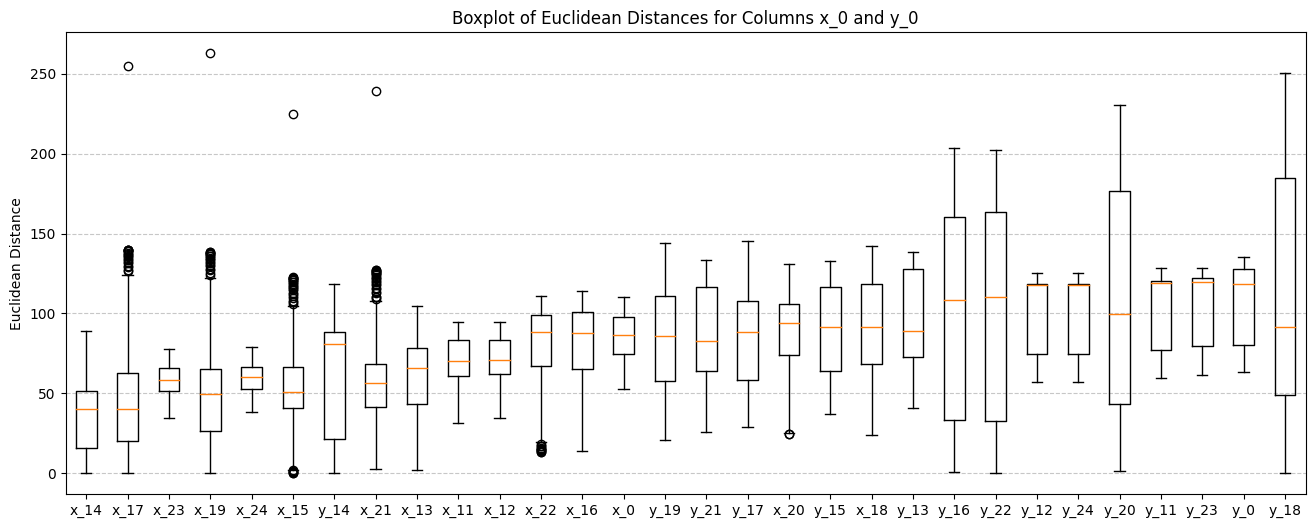

In [162]:
# Select only the 'x_0' and 'y_0' columns from the sorted DataFrame
selected_columns = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24', 'y_0', 
                    'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

# Calculate the mean of Euclidean distances for each column
mean_distances = euclidean_df_03[selected_columns].mean()

# Sort the DataFrame by the mean distance in ascending order
sorted_df = euclidean_df_03[mean_distances.sort_values().index]

# Plotting the box plot
plt.figure(figsize=(16, 6))
plt.boxplot(sorted_df.values)
plt.xticks(range(1, len(sorted_df.columns) + 1), sorted_df.columns)
plt.title('Boxplot of Euclidean Distances for Columns x_0 and y_0')
plt.ylabel('Euclidean Distance')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Vergleich ganzer Oberkörper

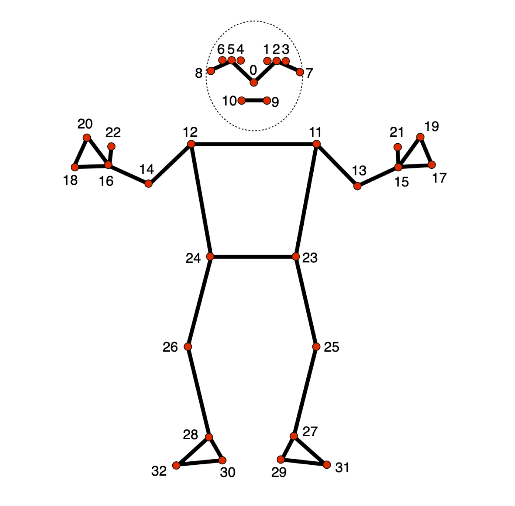

In [163]:
# Inserting an image
img = plt.imread('Pictures/landmark.png')  # Replace 'landmark.png' with the path to your image
im = OffsetImage(img, zoom=0.2)  # Adjust the zoom level as needed
ab = AnnotationBbox(im, (0.5, 0.5), frameon=False)
plt.gca().add_artist(ab)

# Remove axis
plt.axis('off')

plt.show()

# Difference in Mean Upper Body

In [164]:
selected_columns = ['x_0', 'y_0', 'z_0', 'x_11', 'y_11', 'z_11',
                    'x_12', 'y_12', 'z_12', 'x_13', 'y_13', 'z_13', 
                    'x_14', 'y_14', 'z_14', 'x_15', 'y_15', 'z_15',
                    'x_16', 'y_16', 'z_16', 'x_17', 'y_17', 'z_17', 
                    'x_18', 'y_18', 'z_18', 'x_19', 'y_19', 'z_19',
                    'x_20', 'y_20', 'z_20', 'x_21', 'y_21', 'z_21', 
                    'x_22', 'y_22', 'z_22', 'x_23', 'y_23', 'z_23',
                    'x_24', 'y_24', 'z_24']

difference_in_mean_upper_body_01 = mean_values_01[selected_columns].mean() - mean_values_03[selected_columns].mean()

print(f"Mean Value: {difference_in_mean_upper_body_01}")

Mean Value: x_0      80.562058
y_0     105.384337
z_0    -246.194030
x_11     65.385034
y_11    102.570001
z_11   -255.456007
x_12     66.477400
y_12    100.411307
z_12   -242.159646
x_13     57.552464
y_13     91.240362
z_13   -284.804799
x_14     32.359836
y_14     60.485018
z_14   -218.897912
x_15     58.682604
y_15     84.620474
z_15   -302.096124
x_16     69.436446
y_16     92.901059
z_16   -246.585050
x_17     52.386531
y_17     80.859286
z_17   -308.771132
x_18     80.120805
y_18     98.153376
z_18   -250.272674
x_19     58.213632
y_19     79.481942
z_19   -309.690591
x_20     77.960535
y_20     98.999120
z_20   -251.856971
x_21     61.124704
y_21     81.110002
z_21   -304.316835
x_22     69.466770
y_22     95.072680
z_22   -250.063900
x_23     54.674171
y_23    103.591229
z_23   -243.196257
x_24     56.327559
y_24    100.422939
z_24   -219.927332
dtype: float64


In [165]:
selected_columns_X = ['x_0', 'x_11', 'x_12', 'x_13', 
                    'x_14', 'x_15', 'x_16', 'x_17', 
                    'x_18', 'x_19', 'x_20', 'x_21', 
                    'x_22', 'x_23', 'x_24']

selected_columns_Y = ['y_0', 'y_11', 'y_12', 'y_13', 
                    'y_14', 'y_15', 'y_16', 'y_17', 
                    'y_18', 'y_19', 'y_20', 'y_21', 
                    'y_22', 'y_23', 'y_24']

selected_columns_Z = ['z_0', 'z_11', 'z_12', 'z_13', 
                    'z_14', 'z_15', 'z_16', 'z_17', 
                    'z_18', 'z_19', 'z_20', 'z_21', 
                    'z_22', 'z_23', 'z_24']

difference_in_mean_upper_body_01_X = difference_in_mean_upper_body_01[selected_columns_X]
difference_in_mean_upper_body_01_Y = difference_in_mean_upper_body_01[selected_columns_Y]
difference_in_mean_upper_body_01_Z = difference_in_mean_upper_body_01[selected_columns_Z]

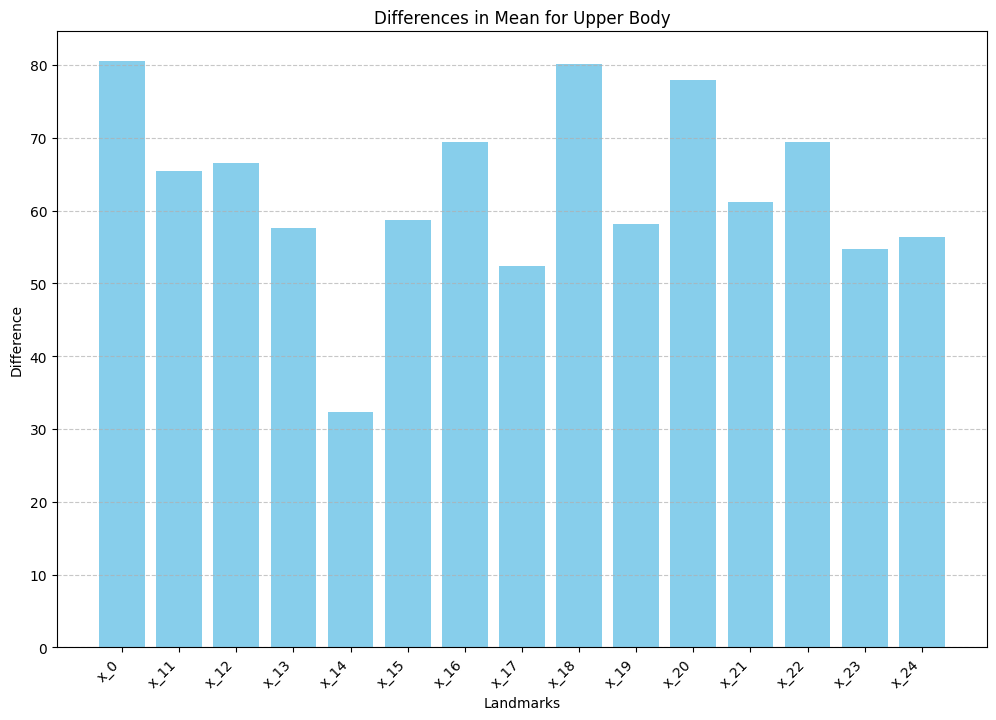

In [166]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_X.index, difference_in_mean_upper_body_01_X, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


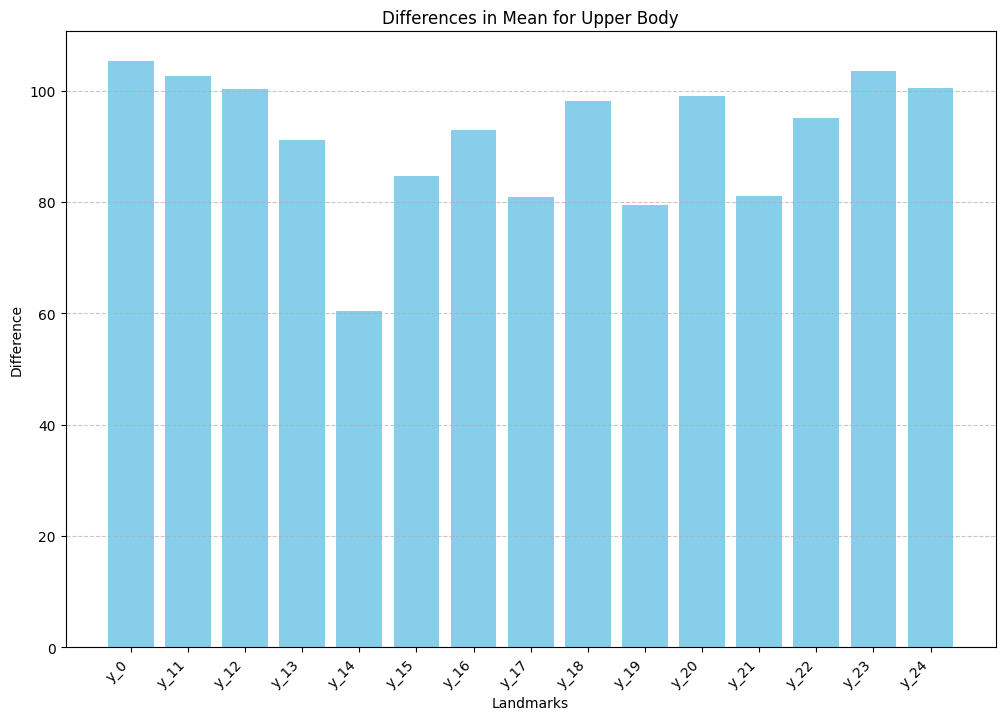

In [167]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Y.index, difference_in_mean_upper_body_01_Y, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

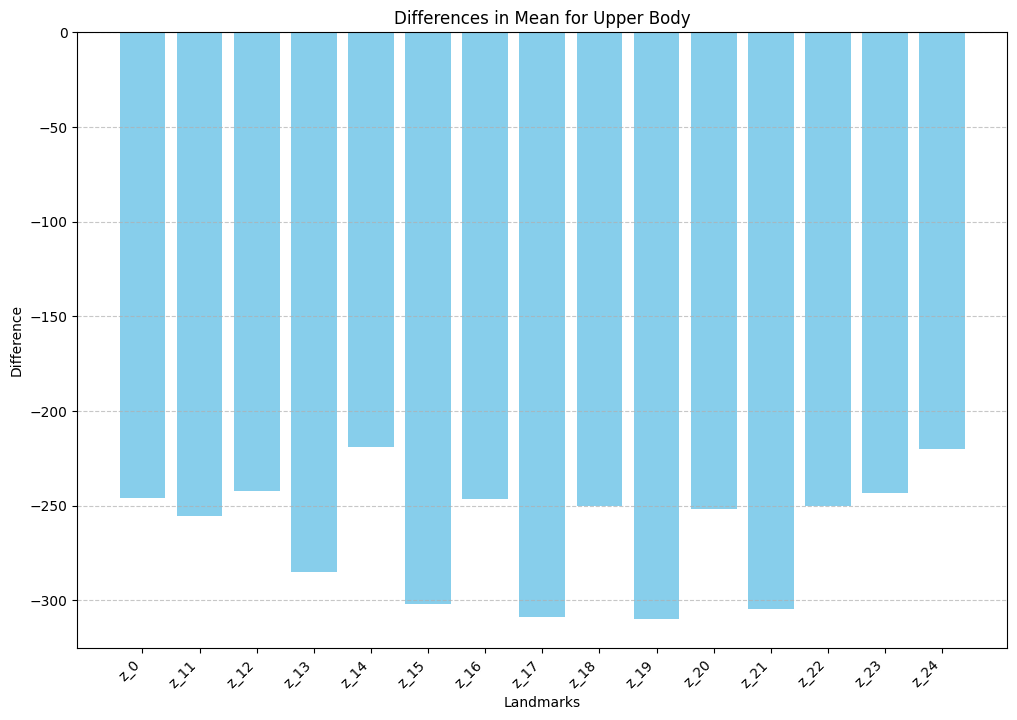

In [168]:
# Plotting the bar chart
plt.figure(figsize=(12, 8))
plt.bar(difference_in_mean_upper_body_01_Z.index, difference_in_mean_upper_body_01_Z, color='skyblue')
plt.title('Differences in Mean for Upper Body')
plt.xlabel('Landmarks')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()